In [ ]:
!pip install fredapi > /dev/null

# Import libraries and API key from Fred Economic Research Website

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '47ecf98918c5516911325388b866c2cd'

# Create the Fred Object

In [18]:
fred = Fred(api_key=fred_key)

## Search for economic data

In [24]:
sp_search = fred.search('S&P', order_by='popularity')

In [25]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-12-26,2023-12-26,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-12-22,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-12-26 11:25:05-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-12-26,2023-12-26,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-12-26 08:12:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2023-12-26,2023-12-26,S&P 500,2013-12-23,2023-12-22,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-12-22 19:13:16-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-12-26,2023-12-26,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-12-26,2023-12-26,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-12-22,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-12-26 11:25:09-06:00,82,This data represents the effective yield of th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSHRCPQAA156NRUG,CSHRCPQAA156NRUG,2023-12-26,2023-12-26,Share of Residual Trade and GDP Statistical Di...,1970-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:32:26-06:00,3,Source ID: csh_r When using these data in you...
CSHRCPSEA156NRUG,CSHRCPSEA156NRUG,2023-12-26,2023-12-26,Share of Residual Trade and GDP Statistical Di...,1950-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:32:26-06:00,3,Source ID: csh_r When using these data in you...
DDEM01ECA156NWDB,DDEM01ECA156NWDB,2023-12-26,2023-12-26,Stock Market Turnover Ratio (Value Traded/Capi...,1995-01-01,2000-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:42-05:00,3,Total value of shares traded during the period...


# Pull Raw Data

In [161]:
sp500 = fred.get_series('SP500')

<Axes: title={'center': 'S&P 500'}>

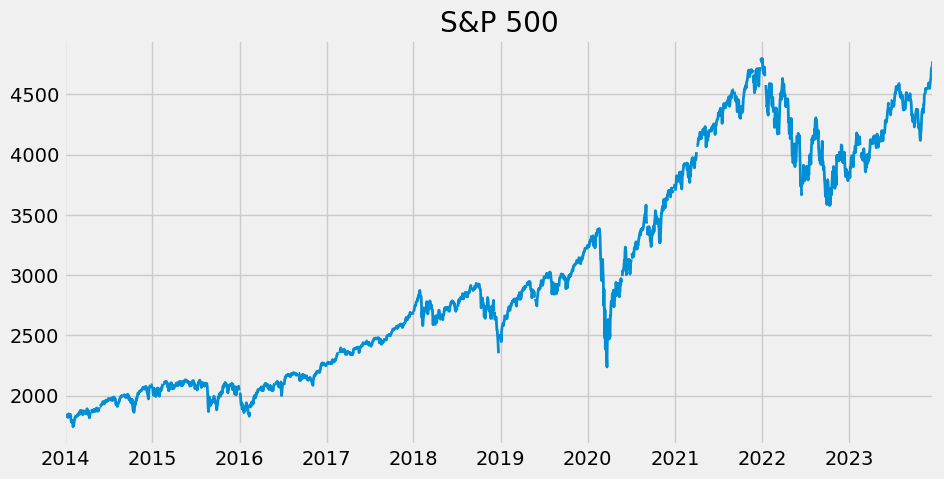

In [162]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)

# Pull and Join Multiple Data Series

In [163]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LRUN24TTUSM156S,LRUN24TTUSM156S,2023-12-27,2023-12-27,Unemployment Rate: Aged 15-24: All Persons for...,1960-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:00:10-06:00,3,OECD Descriptor ID: LRUN24TT OECD unit ID: PC ...
LNS14000086,LNS14000086,2023-12-27,2023-12-27,Unemployment Rate - 16-17 Yrs.,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:51:42-06:00,3,The series comes from the 'Current Population ...
LNS14000327,LNS14000327,2023-12-27,2023-12-27,"Unemployment Rate - 25-34 Yrs., Women",1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:58-06:00,3,To obtain estimates of women worker employment...
LNS14000341,LNS14000341,2023-12-27,2023-12-27,"Unemployment Rate - 45-54 Yrs., Women",1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:51:41-06:00,3,To obtain estimates of women worker employment...
LNS14000315,LNS14000315,2023-12-27,2023-12-27,Unemployment Rate - Married Women,1955-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:45-06:00,3,To obtain estimates of women worker employment...
LNS14000029,LNS14000029,2023-12-27,2023-12-27,"Unemployment Rate - 20 Yrs. & over, White Women",1954-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:59-06:00,2,To obtain estimates of women worker employment...
LNS14000093,LNS14000093,2023-12-27,2023-12-27,Unemployment Rate - 45-54 Yrs.,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:51:17-06:00,2,The series comes from the 'Current Population ...
LNS14023705,LNS14023705,2023-12-27,2023-12-27,Unemployment Rate - Job Leavers,1967-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:58-06:00,2,The series comes from the 'Current Population ...
LRUNTTFEUSM156S,LRUNTTFEUSM156S,2023-12-27,2023-12-27,Unemployment Rate: Aged 15 and over: Females f...,1960-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:00:37-06:00,2,OECD Descriptor ID: LRUNTTFE OECD unit ID: PC ...


In [172]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [175]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [186]:
uemp_states = uemp_results.copy()
uemp_states = uemp_states.dropna()

# Renaming the states to clearly differentiate
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [188]:
# Plot States Unemployment Rate
px.line(uemp_states)

# Pull April 2020 Unemployment Rate Per State

In [ ]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pull Participation Rate

In [ ]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [ ]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) 
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Plot Unemployment vs Participation for each state!

In [ ]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

In [ ]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()